In [140]:
# makes matplotlib plots look like they're part of the notebook?
%matplotlib inline

# import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import matplotlib
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import netcdf
import netCDF4
from netCDF4 import Dataset

# import os
import os

In [141]:
plt.rcParams.keys()
params = {'axes.labelsize': 30,
          'axes.titlesize': 34,
          'axes.titlepad': 2,
          'xtick.labelsize': 26,
         'ytick.labelsize': 26,
         'legend.title_fontsize':18,
         'legend.fontsize':16}
plt.rcParams.update(params)

In [144]:
# read in netcdf dataset (change to your pathfile)
filename = Dataset(
    r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2020083112_e2020090112_vhr09_240000L_20200901_120000V_pairs.nc', 'r')
filename_str=r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2017072312_e2017072412_vhr09_240000L_20170724_120000V_pairs.nc'
# filename1 = Dataset(
#    r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2020083112_e2020090112_vhr09_240000L_20200901_120000V_pairs.nc', 'r')

# filename2 = Dataset(
#     r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2020022912_e2020030112_vhr09_240000L_20200301_120000V_pairs.nc', 'r')

# # use to plot all figures in a folder
# for filename in os.listdir(r'C:\Users\meira\OneDrive - University of Florida\UF_Thesis_Research\ERO_NetCDF\75th_quartile\winter'):
#     ERO_file = Dataset(r'C:\Users\meira\OneDrive - University of Florida\UF_Thesis_Research\ERO_NetCDF\75th_quartile\winter\\'+ filename, 'a')
#     plot_EROs(ERO_file)

print(filename1.variables)


{'FCST_ERO_Surface_FULL': <class 'netCDF4._netCDF4.Variable'>
float32 FCST_ERO_Surface_FULL(lat, lon)
    name: ERO
    long_name: ERO at Surface
    level: Surface
    units: None
    init_time: 20200831_120000
    init_time_ut: 1598875200
    valid_time: 20200901_120000
    valid_time_ut: 1598961600
    accum_time: 240000
    accum_time_sec: 86400
    _FillValue: -9999.0
    desc: ALL
    masking_region: FULL
    smoothing_method: MAX
    smoothing_neighborhood: 49
unlimited dimensions: 
current shape = (276, 721)
filling on, 'OBS_ALL_A365324_FULL_MAX_49': <class 'netCDF4._netCDF4.Variable'>
float32 OBS_ALL_A365324_FULL_MAX_49(lat, lon)
    name: ALL
    long_name: ALL at A365324
    level: A365324
    units: None
    init_time: 20200901_120000
    init_time_ut: 1598961600
    valid_time: 20200901_120000
    valid_time_ut: 1598961600
    accum_time: 365324
    accum_time_sec: 132804
    _FillValue: -9999.0
    desc: ALL
    masking_region: FULL
    smoothing_method: MAX
    smoothing

In [145]:
#use to loop and plot all figures
def plot_EROs(ERO_read):

    #create lat, lon, ERO, OBS variables
    lat_plot = ERO_read.variables['lat'][:]
    lon_plot = ERO_read.variables['lon'][:]
    FCST_plot = ERO_read.variables['FCST_ERO_Surface_FULL'][:, :]
    OBS_plot = ERO_read.variables['OBS_ALL_A365324_FULL_MAX_49'][:, :]

    #draw basemap
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')
    ax.set_extent([-130, -60, 20, 55])

    # OBS plot
    OBS = ax.contour(lon_plot, lat_plot, OBS_plot, colors = ['grey'], transform=ccrs.PlateCarree(), label = 'OBS')
    # ERO plot                                                                                 
    ERO = ax.contourf(lon_plot, lat_plot, FCST_plot, colors = ['white','green','yellow','yellow','red','red','red','grey'] , alpha = 0.5, extend = 'neither', transform=ccrs.PlateCarree(), label = 'ERO')

  
    cbar = plt.legend([ERO.colors])
    #OBS_legend,_ = OBS.legend_elements()
    ERO_legend,_ = ERO.legend_elements()
    #OBS_legend_box = ax.legend([OBS_legend[0]], ['Flood Proxy/Observation'])
    ERO_legend_box = ax.legend([ERO_legend[0], ERO_legend[1], ERO_legend[2], ERO_legend[5]], ['No Risk', 'Marginal Risk', 'Slight Risk', 'Moderate Risk'], loc = 'lower right', title = 'Excessive Rainfall Outlook')

    # title
    #title = plt.title("Excessive Rainfall Outlook and Flooding Proxies and Observations, valid 12Z " + filename_str[97:105] + " to " + filename_str[109:117])

    # save a fig if you'd like
    fig.savefig('ERO_20180908_09.png')

/apps/geopython/1.0.1/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'label'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/apps/geopython/1.0.1/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'label'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


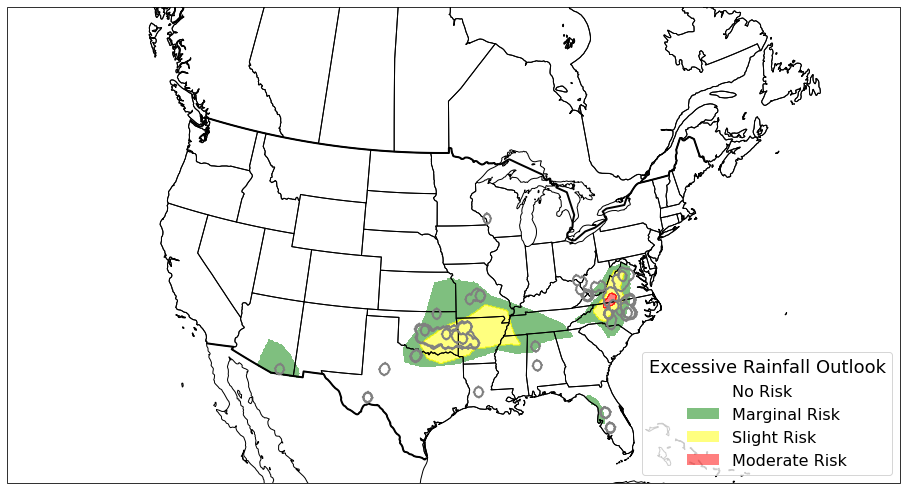

In [146]:
plot_EROs(filename)